# Установка зависимостей

In [ ]:
!nvidia-smi

Fri Feb  6 10:53:11 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install --upgrade ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO

In [ ]:
!pip install --upgrade roboflow

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from roboflow import Roboflow

In [ ]:
!mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [ ]:
%cd {HOME}/datasets

/content/datasets


# Конфигурация API ключей
Перед тем как перейти на следующий этап, убедитесь что вы добавили Roboflow_API в свои секреты на Google colab

*   Откройте "Settings" на сайте roboflow.com. Нажмите на 'API keys' -> "Copy"
*   На сайте Colab, откройте панель слева и нажмите на "Секреты" (🔑). Сохраните ключ API под именем ROBOFLOW_API_KEY.

In [ ]:
from google.colab import userdata

In [ ]:
ROBOFLOW_API_KEY = userdata.get('RobovlowAPI')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(20)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q gdown inference-gpu supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 

# Загрузка видео

In [ ]:
!mkdir -p {HOME}/clips
%cd {HOME}/clips

!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

/content/clips
Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/clips/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 29.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/clips/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 45.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/clips/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 41.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/clips/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 53.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/clips/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 33.6MB/s]


# Предвадительное видео

In [ ]:
PLAYER_DETECTION_MODEL = YOLO('/content/drive/MyDrive/best_90ep.pt')

In [ ]:
%cd {HOME}
!mkdir {HOME}/out_vids

/content


In [ ]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH="/content/clips/121364_0.mp4"
TARGET_VIDEO_PATH="/content/out_vids/121364_0_result_1.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness = 2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex('#000000')
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
  for frame in tqdm(frame_generator, total=video_info.total_frames):

    result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3, verbose=False)

    boxes = result[0].boxes.xyxy.cpu().numpy()
    confidences = result[0].boxes.conf.cpu().numpy()
    class_ids = result[0].boxes.cls.cpu().numpy().astype(int)

    detections = sv.Detections(
        xyxy=boxes,
        confidence=confidences,
        class_id=class_ids
    )

    class_names = ['ball', 'goalkeeper', 'player', 'referee']
    class_labels = [class_names[class_id] for class_id in class_ids]

    labels = [
        f"{class_names[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(class_ids, confidences)
    ]

    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(annotated_frame, detections)
    annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)
    video_sink.write_frame(annotated_frame)


100%|██████████| 750/750 [02:04<00:00,  6.00it/s]


# Добавление отслеживания(ByteTrack)

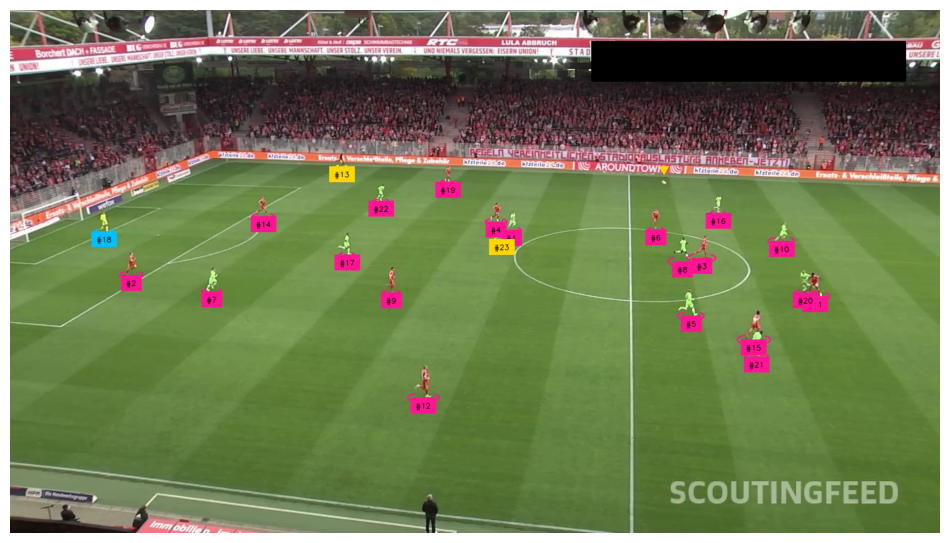

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH="/content/clips/121364_0.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness = 2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3)


boxes = result[0].boxes.xyxy.cpu().numpy()
confidences = result[0].boxes.conf.cpu().numpy()
class_ids = result[0].boxes.cls.cpu().numpy().astype(int)

detections = sv.Detections(
    xyxy=boxes,
    confidence=confidences,
    class_id=class_ids
)

class_names = ['ball', 'goalkeeper', 'player', 'referee']
class_labels = [class_names[class_id] for class_id in class_ids]


ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id = all_detections.class_id - 1
all_detections = tracker.update_with_detections(all_detections)



labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]


annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

### Сохранение видео с отслеживанием

In [ ]:
import cv2
import supervision as sv

SOURCE_VIDEO_PATH = "/content/clips/121364_0.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter('/content/out_vids/tracker_121364_dr.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

TOTAL_FRAMES = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
progress_bar = tqdm(total=TOTAL_FRAMES, desc="Processing Frames")

while True:
    frame = next(frame_generator, None)
    if frame is None:
        break

    result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3, verbose=False)

    boxes = result[0].boxes.xyxy.cpu().numpy()
    confidences = result[0].boxes.conf.cpu().numpy()
    class_ids = result[0].boxes.cls.cpu().numpy().astype(int)

    detections = sv.Detections(
        xyxy=boxes,
        confidence=confidences,
        class_id=class_ids
    )

    class_names = ['ball', 'goalkeeper', 'player', 'referee']
    class_labels = [class_names[class_id] for class_id in class_ids]

    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    all_detections = detections[detections.class_id != BALL_ID]
    all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
    all_detections.class_id = all_detections.class_id - 1
    all_detections = tracker.update_with_detections(all_detections)

    labels = [
        f"#{tracker_id}"
        for tracker_id in all_detections.tracker_id
    ]

    annotated_frame = frame.copy()
    annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
    annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
    annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

    out.write(annotated_frame)
    progress_bar.update(1)

cap.release()
out.release()


# Разделение игроков на комманды с помощью SigLip, KMeans

In [ ]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "/content/clips/121364_0.mp4"

STRIDE = 30
PLAYER_ID = 2

def extract_crops(source_video_path: str):
    frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, stride=STRIDE)

    crops=[]
    for frame in tqdm(frame_generator, desc='collecting crops'):
        result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3, verbose=False)

        boxes = result[0].boxes.xyxy.cpu().numpy()
        confidences = result[0].boxes.conf.cpu().numpy()
        class_ids = result[0].boxes.cls.cpu().numpy().astype(int)

        detections = sv.Detections(
            xyxy=boxes,
            confidence=confidences,
            class_id=class_ids
        )

        detections = detections.with_nms(threshold=0.5, class_agnostic=True)
        detections = detections[detections.class_id == PLAYER_ID]
        crops += [
            sv.crop_image(frame, xyxy)
            for xyxy in detections.xyxy
        ]

    return crops

In [ ]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 25it [00:07,  3.34it/s]


In [ ]:
len(crops)

520

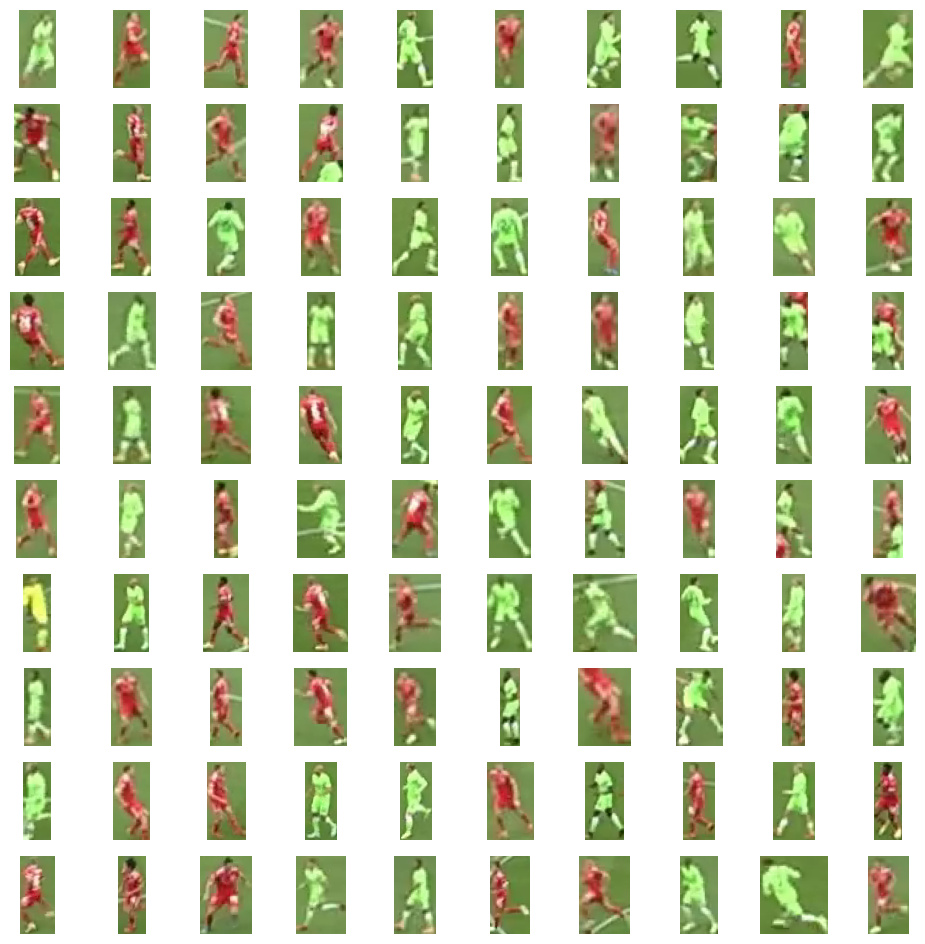

In [ ]:
sv.plot_images_grid(crops[:100], grid_size = (10, 10))

In [ ]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
import numpy as np
from more_itertools import chunked
BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []

with torch.no_grad():
    for batch in tqdm(batches, desc = 'Embeddings extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors='pt').to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

Embeddings extraction: 17it [00:06,  2.77it/s]


In [ ]:
data.shape

(520, 768)

### Уменьшение размера массива с помощью UMAP

In [ ]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [ ]:
projections = REDUCER.fit_transform(data)

In [ ]:
projections.shape

(520, 3)

### Вписывание данных в модель кластеризации KMeans

In [ ]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [ ]:
clusters[:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
team_0 = [
    crop
    for crop, cluster
    in zip(crops, clusters)
    if cluster==0
]

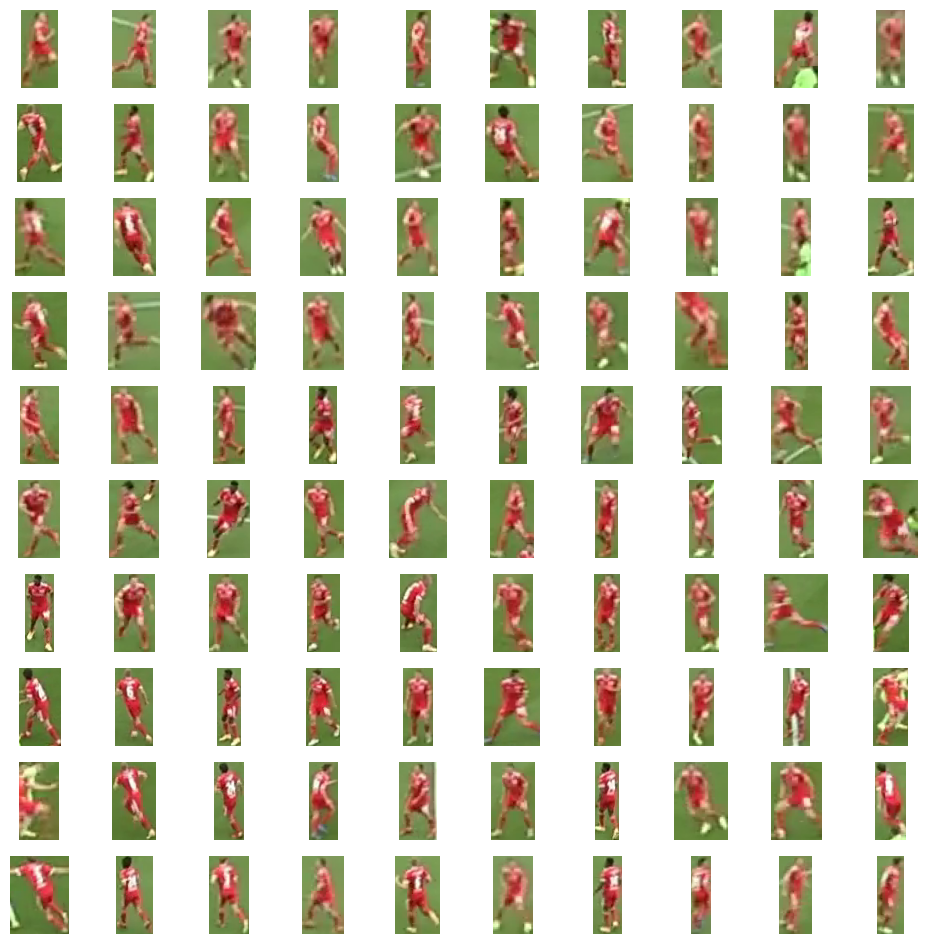

In [ ]:
sv.plot_images_grid(team_0[:100], grid_size=(10, 10))

### Полноценная имплементация метода выше(класс TeamClassifier для разделения игроков на комманды)

In [ ]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class TeamClassifier:
    def __init__(self, model_path='google/siglip-base-patch16-224', device='cuda'):
        self.device = device
        self.model = SiglipVisionModel.from_pretrained(model_path).to(device)
        self.processor = AutoProcessor.from_pretrained(model_path)

        self.reducer = None
        self.kmeans = None
        self.centers = None

    def _embed(self, images):
        with torch.no_grad():
            inputs = self.processor(images=images, return_tensors='pt').to(self.device)
            outputs = self.model(**inputs)
            embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        return embeddings

    def fit(self, crops, n_teams=2):
        embeddings = self._embed(crops)

        self.reducer = umap.UMAP(n_components=3)
        proj = self.reducer.fit_transform(embeddings)

        self.kmeans = KMeans(n_clusters=n_teams)
        self.kmeans.fit(proj)

        self.centers = self.kmeans.cluster_centers_

        return self

    def predict(self, crops):
        embeddings = self._embed(crops)
        proj = self.reducer.transform(embeddings)
        return self.kmeans.predict(proj)

    def predict_single(self, crop):
        return self.predict([crop])[0]


### Функция для нахождения команды вратарей

In [ ]:
def resolve_goalkeepers_team_id(
    players_detections: sv.Detections,
    goalkeepers_detections: sv.Detections
):
    goalkeepers_xy = goalkeepers_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

    team_0_centroid = players_xy[players_detections.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players_detections.class_id == 1].mean(axis=0)

    goalkeepers_team_ids = []
    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_ids)

collecting crops: 25it [00:05,  4.74it/s]


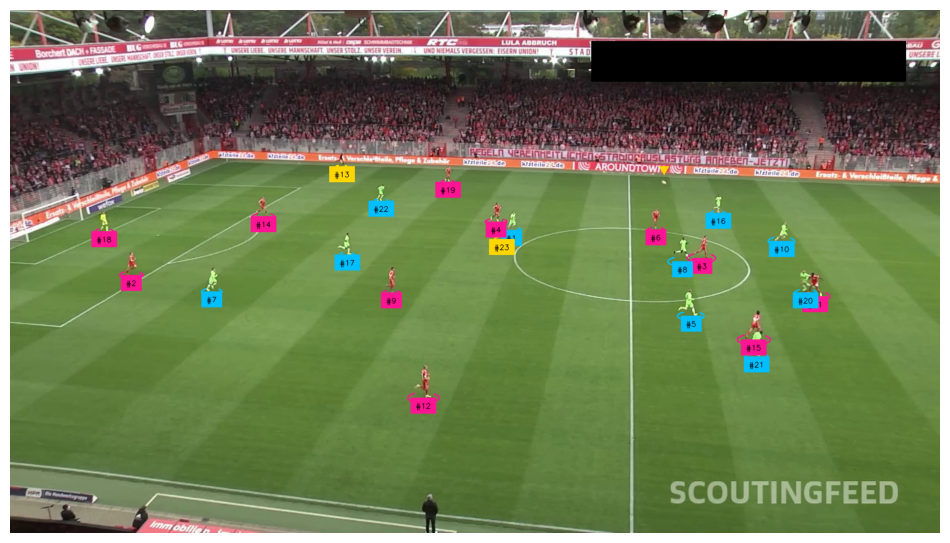

In [ ]:
import supervision as sv


SOURCE_VIDEO_PATH="/content/clips/121364_0.mp4"
BALL_ID = 0
PLAYER_ID = 2
GOALKEEPER_ID = 1
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness = 2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color = sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()


frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3)


boxes = result[0].boxes.xyxy.cpu().numpy()
confidences = result[0].boxes.conf.cpu().numpy()
class_ids = result[0].boxes.cls.cpu().numpy().astype(int)

detections = sv.Detections(
    xyxy=boxes,
    confidence=confidences,
    class_id=class_ids
)

class_names = ['ball', 'goalkeeper', 'player', 'referee']
class_labels = [class_names[class_id] for class_id in class_ids]


ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(all_detections)



players_detections = all_detections[all_detections.class_id == PLAYER_ID]
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
referee_detections = all_detections[all_detections.class_id == REFEREE_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)


goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections
)

referee_detections.class_id -= 1

all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referee_detections])

labels = [
    f"#{tracker_id}"
    for tracker_id in
    all_detections.tracker_id
]


annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

### Сохранение конечного видео

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/clips/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

TARGET_VIDEO_PATH = "/content/out_vids/broadcast_final1.mp4"
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

tracker = sv.ByteTrack()
tracker.reset()

with sv.VideoSink(target_path=TARGET_VIDEO_PATH, video_info=video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.predict(frame, imgsz=1280, conf=0.3, verbose=False)[0]

        detections = sv.Detections.from_ultralytics(result)

        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(detections=all_detections)

        goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
        players_detections = all_detections[all_detections.class_id == PLAYER_ID]
        referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

        players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
        players_detections.class_id = team_classifier.predict(players_crops)

        goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
            players_detections, goalkeepers_detections)

        referees_detections.class_id -= 1

        all_detections = sv.Detections.merge([
            players_detections, goalkeepers_detections, referees_detections])

        all_detections.class_id = all_detections.class_id.astype(int)

        labels = [f"#{tid}"
                  for tid
                  in all_detections.tracker_id]

        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)

        sink.write_frame(annotated_frame)

collecting crops: 25it [00:05,  4.25it/s]
100%|██████████| 750/750 [05:40<00:00,  2.20it/s]
